Implementation of svm using python
compare performance of svm with tree based classifier
types of dt, diff parameters
default parameters
criterion try ig and entropy

In [1]:
# Import library
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset (Iris, only 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]  # take only 2 features for easy plotting
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


SVM (RBF Kernel) Performance:
Accuracy: 0.7333333333333333
Precision: 0.7259615384615385
Recall: 0.7333333333333333
F1 Score: 0.728110599078341


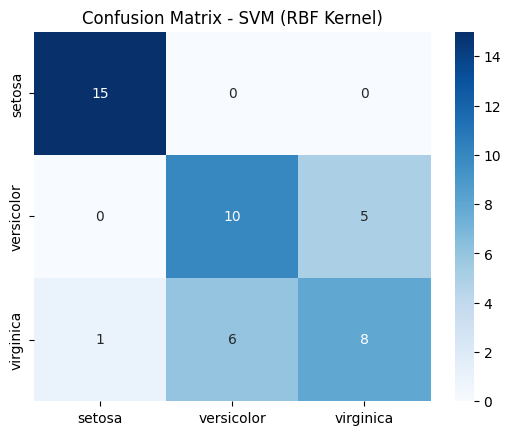

In [2]:
# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Performance
print("SVM (RBF Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rbf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rbf, average='weighted'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.show()


SVM (Linear Kernel) Performance:
Accuracy: 0.7111111111111111
Precision: 0.7029761904761904
Recall: 0.7111111111111111
F1 Score: 0.7064886911383018


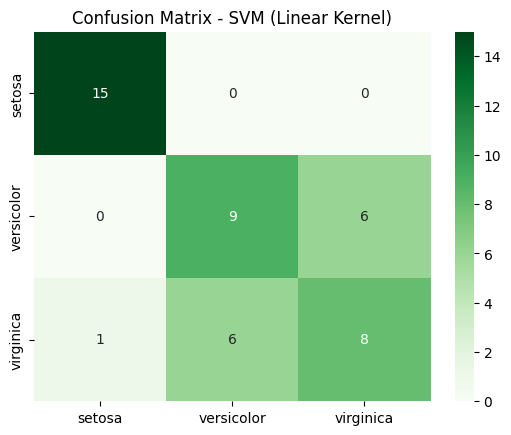

In [3]:
# SVM with Linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Performance
print("SVM (Linear Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_linear, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_linear, average='weighted'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()


Decision Tree (Gini) Performance:
Accuracy: 0.7333333333333333
Precision: 0.7222222222222222
Recall: 0.7333333333333333
F1 Score: 0.7227833894500562


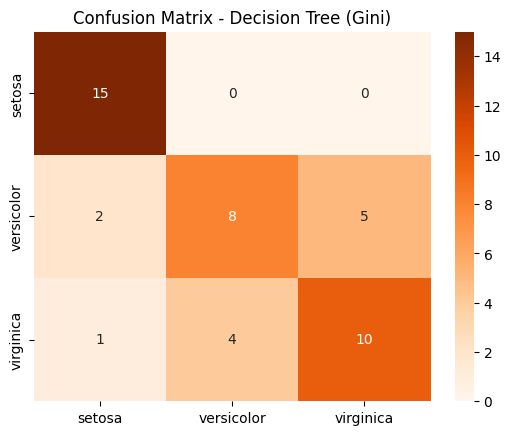

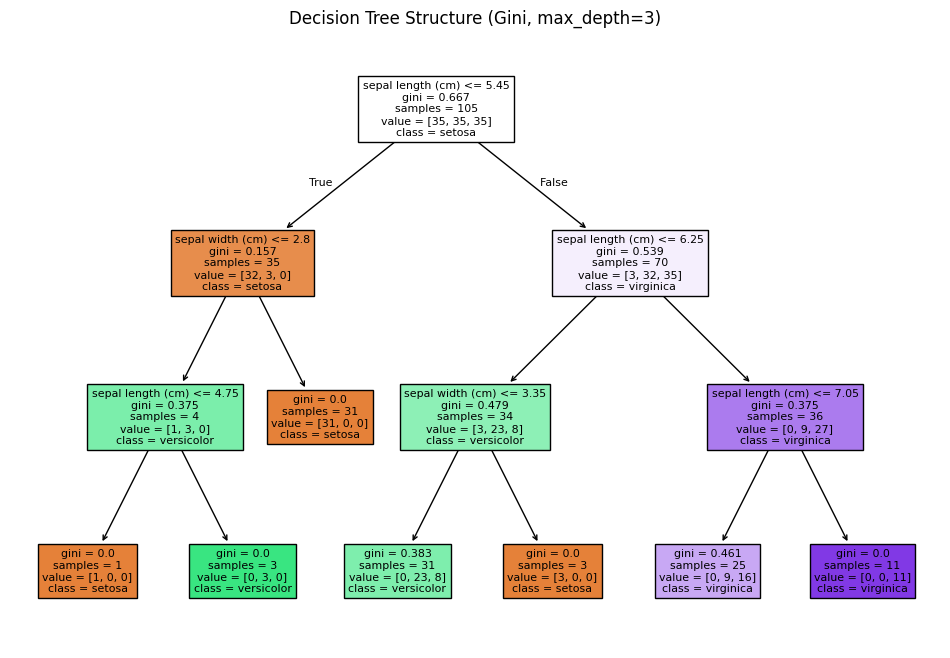

In [4]:
# Decision Tree with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_gini.fit(X_train, y_train)
y_pred_dt = dt_gini.predict(X_test)

# Performance
print("Decision Tree (Gini) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - Decision Tree (Gini)")
plt.show()

# Plot Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_gini, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.title("Decision Tree Structure (Gini, max_depth=3)")
plt.show()


SVM (Polynomial Kernel) Performance:
Accuracy: 0.6888888888888889
Precision: 0.6892911010558069
Recall: 0.6888888888888889
F1 Score: 0.6875


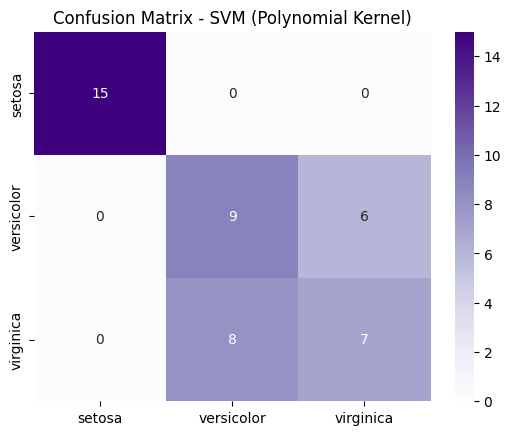

In [5]:
# SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

# Performance
print("SVM (Polynomial Kernel) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Precision:", precision_score(y_test, y_pred_poly, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_poly, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_poly, average='weighted'))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix - SVM (Polynomial Kernel)")
plt.show()

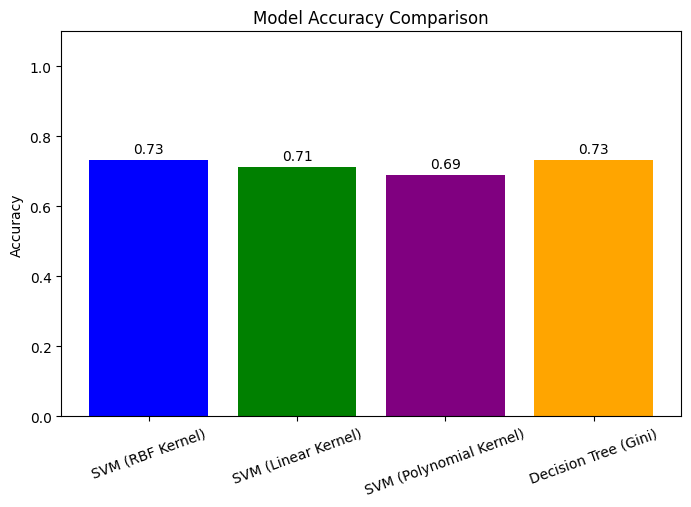

In [6]:
# Compare performance of SVM kernels and Decision Tree

results = {
    "SVM (RBF Kernel)": accuracy_score(y_test, y_pred_rbf),
    "SVM (Linear Kernel)": accuracy_score(y_test, y_pred_linear),
    "SVM (Polynomial Kernel)": accuracy_score(y_test, y_pred_poly),
    "Decision Tree (Gini)": accuracy_score(y_test, y_pred_dt)
}

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "purple", "orange"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
for i, v in enumerate(results.values()):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center')
plt.xticks(rotation=20)
plt.show()

In [7]:
# Default Parameters
dt_default = DecisionTreeClassifier()
svm_default = SVC()

print("\n--- Decision Tree Default Parameters ---")
print(pd.DataFrame(dt_default.get_params().items(), columns=["Parameter", "Default Value"]).to_string(index=False))

print("\n--- SVM Default Parameters ---")
print(pd.DataFrame(svm_default.get_params().items(), columns=["Parameter", "Default Value"]).to_string(index=False))



--- Decision Tree Default Parameters ---
               Parameter Default Value
               ccp_alpha           0.0
            class_weight          None
               criterion          gini
               max_depth          None
            max_features          None
          max_leaf_nodes          None
   min_impurity_decrease           0.0
        min_samples_leaf             1
       min_samples_split             2
min_weight_fraction_leaf           0.0
           monotonic_cst          None
            random_state          None
                splitter          best

--- SVM Default Parameters ---
              Parameter Default Value
                      C           1.0
             break_ties         False
             cache_size           200
           class_weight          None
                  coef0           0.0
decision_function_shape           ovr
                 degree             3
                  gamma         scale
                 kernel           rbf
